- Experiments of toy data. You can test each algorithm on each dataset by excuting the corresponding section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import matchY,measures_calculator
import api
imp.reload(api)

<module 'api' from '../utils/api.py'>

In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'circles':
            df=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='moons':
            df=pd.read_csv('./artificial_csv/moons_0.15_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='impossible':
            df=pd.read_csv('./artificial_csv/impossible++.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='s-set':
            df=pd.read_csv('./artificial_csv/s-set1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='smile':
            df=pd.read_csv('./artificial_csv/smile1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true

# GDT

## circles

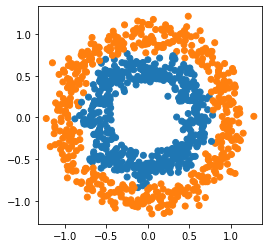

,f1,ARI,ACC,cover_rate,classes
0,0.966994,0.872228,0.967,1.0,2.0


In [3]:
X,Y_true=DataLoader.load('circles')

Y_pred=api.DGSFC.fit(  X,
                  K_d=12,
                  K_s=11,
                  alpha=0.20,
                  epsilon=0,
                  plot=False,
                  scale=True
                 )
plot_tools.autoPlot(X,Y_pred)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## moons

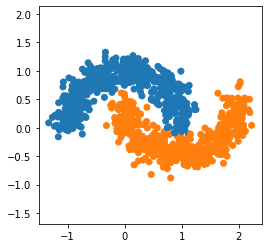

,f1,ARI,ACC,cover_rate,classes
0,0.987,0.948625,0.987,1.0,2.0


In [4]:
X,Y_true=DataLoader.load('moons')

Y_pred=api.DGSFC.fit(  X,
                  K_d=28,
                  K_s=24,
                  alpha=0.1,
                  epsilon=0,
                  plot=False,
                  scale=True
                 )
plot_tools.autoPlot(X,Y_pred)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## impossible

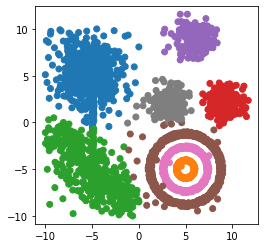

,f1,ARI,ACC,cover_rate,classes
0,0.998479,0.996943,0.998483,1.0,8.0


In [5]:
X,Y_true=DataLoader.load('impossible')

Y_pred=api.DGSFC.fit(  X,
                  K_d=50,
                  K_s=30,
                  alpha=0.1,
                  epsilon=0,
                  plot=False,
                  scale=False
                 )
plot_tools.autoPlot(X,Y_pred,seed=2022)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## s-set

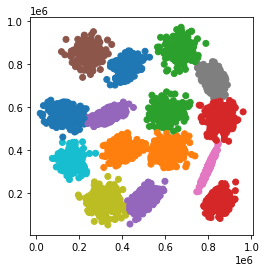

,f1,ARI,ACC,cover_rate,classes
0,0.999,0.997845,0.999,1.0,15.0


In [6]:
X,Y_true=DataLoader.load('s-set')

Y_pred=api.DGSFC.fit(  X,
                  K_d=23,
                  K_s=13,
                  alpha=0.2,
                  epsilon=0,
                  plot=False,
                  scale=True
                 )
plot_tools.autoPlot(X,Y_pred,seed=2019)

Y_pred,Y_true=matchY(Y_pred,Y_true)

result=measures_calculator(Y_true, Y_pred)
result

## smile

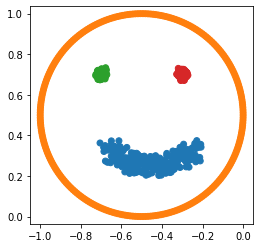

,f1,ARI,ACC,cover_rate,classes
0,1.0,1.0,1.0,1.0,4.0


In [7]:
X,Y_true=DataLoader.load('smile')

Y_pred=api.DGSFC.fit(  X,
                  K_d=23,
                  K_s=20,
                  alpha=0.14,
                  epsilon=0,
                  plot=False,
                  scale=True
                 )

plot_tools.autoPlot(X,Y_pred,seed=2019)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# OPTICS

In [20]:
from sklearn.cluster import OPTICS

## circles

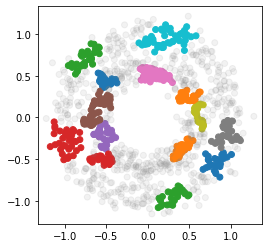

,f1,ARI,ACC,cover_rate,classes
0,0.529646,0.04668,0.540603,0.431,3.0


In [21]:
X,Y_true=DataLoader.load('circles')
clustering = OPTICS(min_samples=2,min_cluster_size=20).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

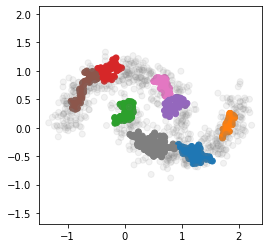

,f1,ARI,ACC,cover_rate,classes
0,0.520729,0.132084,0.4662,0.429,3.0


In [22]:
X,Y_true=DataLoader.load('moons')
clustering = OPTICS(min_samples=2,min_cluster_size=30).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

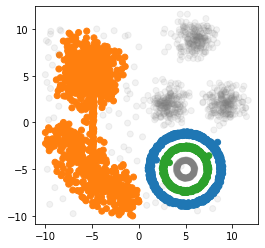

,f1,ARI,ACC,cover_rate,classes
0,0.740142,0.703882,0.814309,0.733839,3.0


In [23]:
X,Y_true=DataLoader.load('impossible')
clustering = OPTICS(min_samples=5,min_cluster_size=400).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

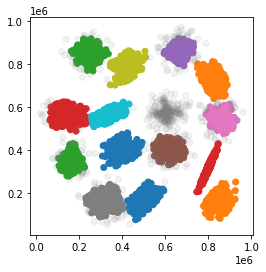

,f1,ARI,ACC,cover_rate,classes
0,0.999554,0.999066,0.999554,0.896,14.0


In [24]:
X,Y_true=DataLoader.load('s-set')
clustering = OPTICS(min_samples=10,min_cluster_size=300).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

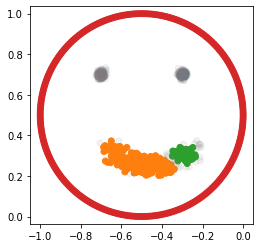

,f1,ARI,ACC,cover_rate,classes
0,0.959443,0.901774,0.927215,0.632,5.0


In [25]:
X,Y_true=DataLoader.load('smile')
clustering = OPTICS(min_samples=3,min_cluster_size=40).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

## circles

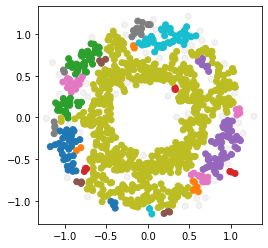

,f1,ARI,ACC,cover_rate,classes
0,0.759976,0.331827,0.756813,0.954,3.0


In [45]:
X,Y_true=DataLoader.load('circles')
dbscan = DBSCAN(eps=0.07, min_samples=2,).fit(X)
Y_pred = dbscan.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

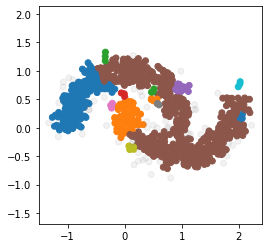

,f1,ARI,ACC,cover_rate,classes
0,0.596829,0.096746,0.572785,0.948,3.0


In [46]:
X,Y_true=DataLoader.load('moons')
dbscan = DBSCAN(eps=0.08, min_samples=3).fit(X)
Y_pred = dbscan.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

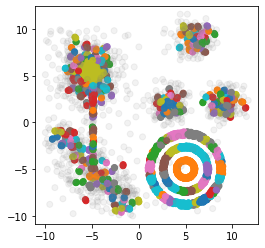

,f1,ARI,ACC,cover_rate,classes
0,0.517289,0.165915,0.530651,0.792109,9.0


In [47]:
X,Y_true=DataLoader.load('impossible')
dbscan = DBSCAN(eps=0.15, min_samples=2).fit(X)
Y_pred = dbscan.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

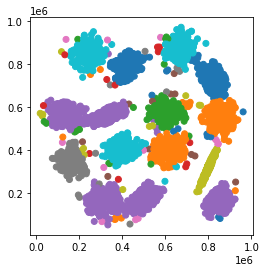

,f1,ARI,ACC,cover_rate,classes
0,0.899597,0.901885,0.9096,1.0,16.0


In [48]:
X,Y_true=DataLoader.load('s-set')
dbscan = DBSCAN(eps=20000, min_samples=1).fit(X)
Y_pred = dbscan.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

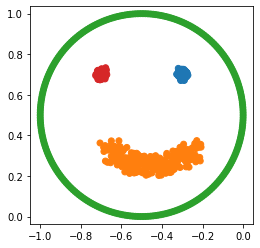

,f1,ARI,ACC,cover_rate,classes
0,1.0,1.0,1.0,1.0,4.0


In [49]:
X,Y_true=DataLoader.load('smile')
dbscan = DBSCAN(eps=0.03, min_samples=1).fit(X)
Y_pred = dbscan.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# HDBSCAN

In [8]:
import hdbscan

## circles

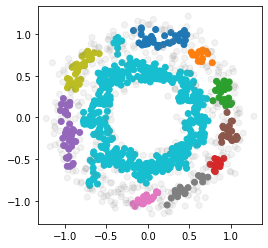

,f1,ARI,ACC,cover_rate,classes
0,0.933218,0.816202,0.91047,0.659,3.0


In [9]:
X,Y_true=DataLoader.load('circles')
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

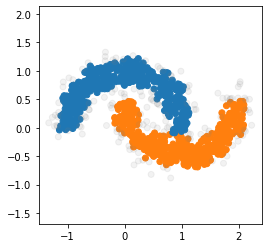

,f1,ARI,ACC,cover_rate,classes
0,0.991889,0.967781,0.991889,0.863,2.0


In [10]:
X,Y_true=DataLoader.load('moons')
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=11)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

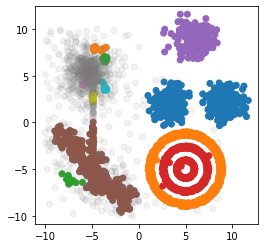

,f1,ARI,ACC,cover_rate,classes
0,0.965699,0.979078,0.951004,0.75569,9.0


In [11]:
X,Y_true=DataLoader.load('impossible')
clusterer = hdbscan.HDBSCAN(min_cluster_size=11, min_samples=5)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

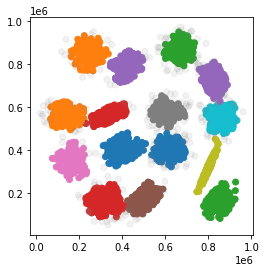

,f1,ARI,ACC,cover_rate,classes
0,0.99875,0.997337,0.998751,0.9608,15.0


In [12]:
X,Y_true=DataLoader.load('s-set')
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

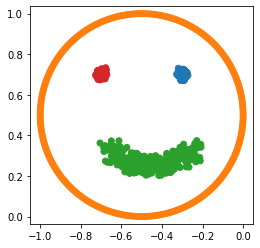

,f1,ARI,ACC,cover_rate,classes
0,1.0,1.0,1.0,1.0,4.0


In [13]:
X,Y_true=DataLoader.load('smile')
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=10)
clusterer.fit(X)
Y_pred=clusterer.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# mean-shift

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

## circles

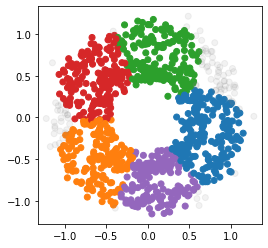

,f1,ARI,ACC,cover_rate,classes
0,0.425812,-0.002635,0.397366,0.911,3.0


In [15]:
X,Y_true=DataLoader.load('circles')
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

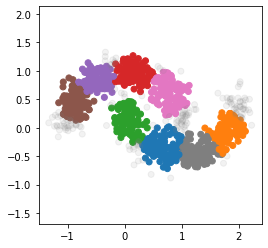

,f1,ARI,ACC,cover_rate,classes
0,0.322924,0.07111,0.377804,0.847,3.0


In [16]:
X,Y_true=DataLoader.load('moons')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

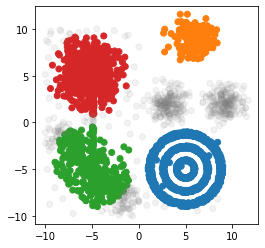

,f1,ARI,ACC,cover_rate,classes
0,0.676155,0.649185,0.757086,0.845827,4.0


In [17]:
X,Y_true=DataLoader.load('impossible')
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

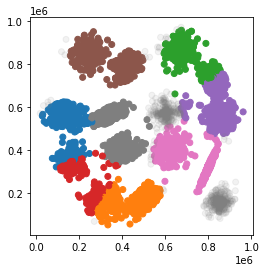

,f1,ARI,ACC,cover_rate,classes
0,0.450178,0.614813,0.58574,0.8724,8.0


In [18]:
X,Y_true=DataLoader.load('s-set')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

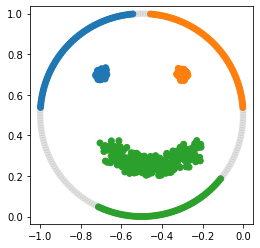

,f1,ARI,ACC,cover_rate,classes
0,0.734711,0.707849,0.816993,0.918,3.0


In [19]:
X,Y_true=DataLoader.load('smile')
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred=ms.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# Quickshift++

In [38]:
from QuickshiftPP import *

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## circles

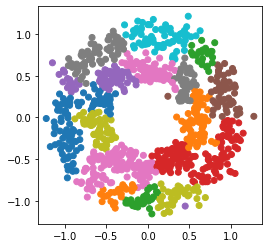

,f1,ARI,ACC,cover_rate,classes
0,0.497063,0.049061,0.548,1.0,3.0


In [39]:
X,Y_true=DataLoader.load('circles')
model = QuickshiftPP(k=10,beta=0.4)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

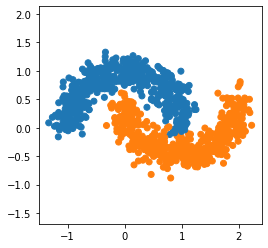

,f1,ARI,ACC,cover_rate,classes
0,0.985,0.940841,0.985,1.0,2.0


In [40]:
X,Y_true=DataLoader.load('moons')
model = QuickshiftPP(k=16,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

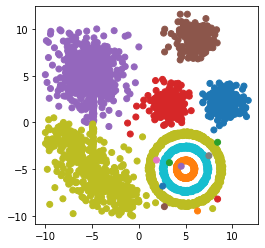

,f1,ARI,ACC,cover_rate,classes
0,0.811959,0.821576,0.863126,1.0,7.0


In [41]:
X,Y_true=DataLoader.load('impossible')
model = QuickshiftPP(k=15,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

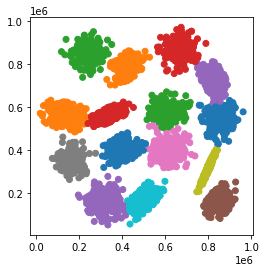

,f1,ARI,ACC,cover_rate,classes
0,0.9978,0.995374,0.9978,1.0,15.0


In [42]:
X,Y_true=DataLoader.load('s-set')
model = QuickshiftPP(k=15,beta=0.9)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

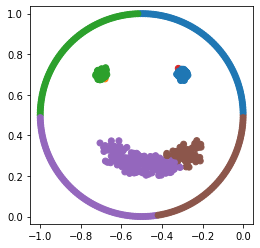

,f1,ARI,ACC,cover_rate,classes
0,0.705631,0.568948,0.742,1.0,5.0


In [43]:
X,Y_true=DataLoader.load('smile')
model = QuickshiftPP(k=15,beta=0.4)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships

plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# spectral clustering

In [26]:
from sklearn.cluster import SpectralClustering

## circles

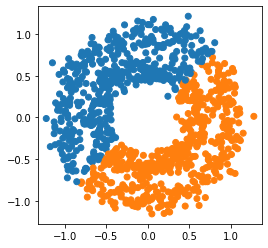

,f1,ARI,ACC,cover_rate,classes
0,0.507929,-0.000745,0.508,1.0,2.0


In [27]:
X,Y_true=DataLoader.load('circles')
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors','rbf'
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

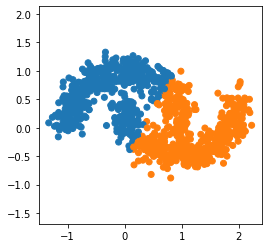

,f1,ARI,ACC,cover_rate,classes
0,0.771955,0.295231,0.772,1.0,2.0


In [28]:
X,Y_true=DataLoader.load('moons')
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

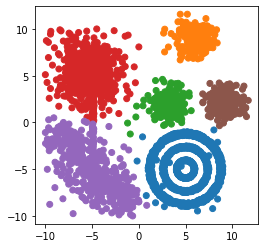

,f1,ARI,ACC,cover_rate,classes
0,0.725628,0.69745,0.79393,1.0,6.0


In [29]:
X,Y_true=DataLoader.load('impossible')
clustering = SpectralClustering(n_clusters=6,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


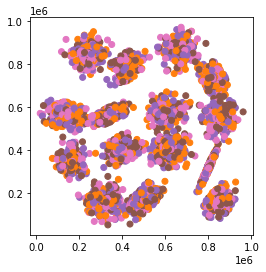

,f1,ARI,ACC,cover_rate,classes
0,0.033601,0.000026,0.0792,1.0,6.0


In [30]:
X,Y_true=DataLoader.load('s-set')
clustering = SpectralClustering(n_clusters=15,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

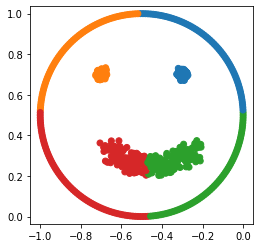

,f1,ARI,ACC,cover_rate,classes
0,0.675486,0.552385,0.703,1.0,4.0


In [31]:
X,Y_true=DataLoader.load('smile')
clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

# k-means

In [32]:
from sklearn.cluster import KMeans

## circles

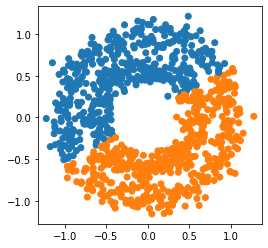

,f1,ARI,ACC,cover_rate,classes
0,0.501839,-0.000985,0.502,1.0,2.0


In [33]:
X,Y_true=DataLoader.load('circles')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## moons

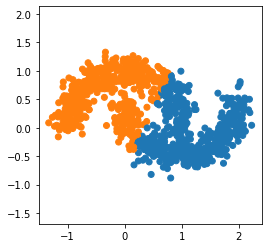

,f1,ARI,ACC,cover_rate,classes
0,0.757938,0.265522,0.758,1.0,2.0


In [34]:
X,Y_true=DataLoader.load('moons')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## impossible

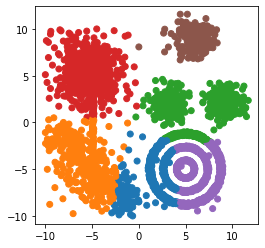

,f1,ARI,ACC,cover_rate,classes
0,0.599051,0.622808,0.626707,1.0,6.0


In [35]:
X,Y_true=DataLoader.load('impossible')
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## s-set

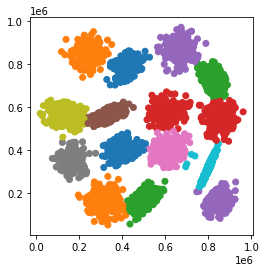

,f1,ARI,ACC,cover_rate,classes
0,0.997603,0.994963,0.9976,1.0,15.0


In [36]:
X,Y_true=DataLoader.load('s-set')
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## smile

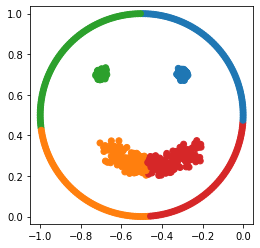

,f1,ARI,ACC,cover_rate,classes
0,0.665563,0.546821,0.696,1.0,4.0


In [37]:
X,Y_true=DataLoader.load('smile')
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
Y_pred = kmeans.labels_
plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result